#Introduction

         
**Early stage diabetes risk prediction** 

Classifier to predict early stage risk of diabities.         
Dataset[1] used has      
attributes : 16 + 1 (class)                                        
instances: 520                                                 
classes (2): Positive/Negetive



The basic idea is to use ensemble of boosted ensemble models of diffrent classifiers. (boosted KNN is ensemble of KNNs with diffrent n trained with adaboost). Weight of prediction is the function of acccuracy evaluted on held out data.

Thus nested ensemble with three levels                 
10 % data was holdout to ensure model is evaluated completely new data as well as training data.

TO evaluate the final ensamble model, we use corss validation (10 folds), accuracy, f1 and f2 scores and ROC AUC 

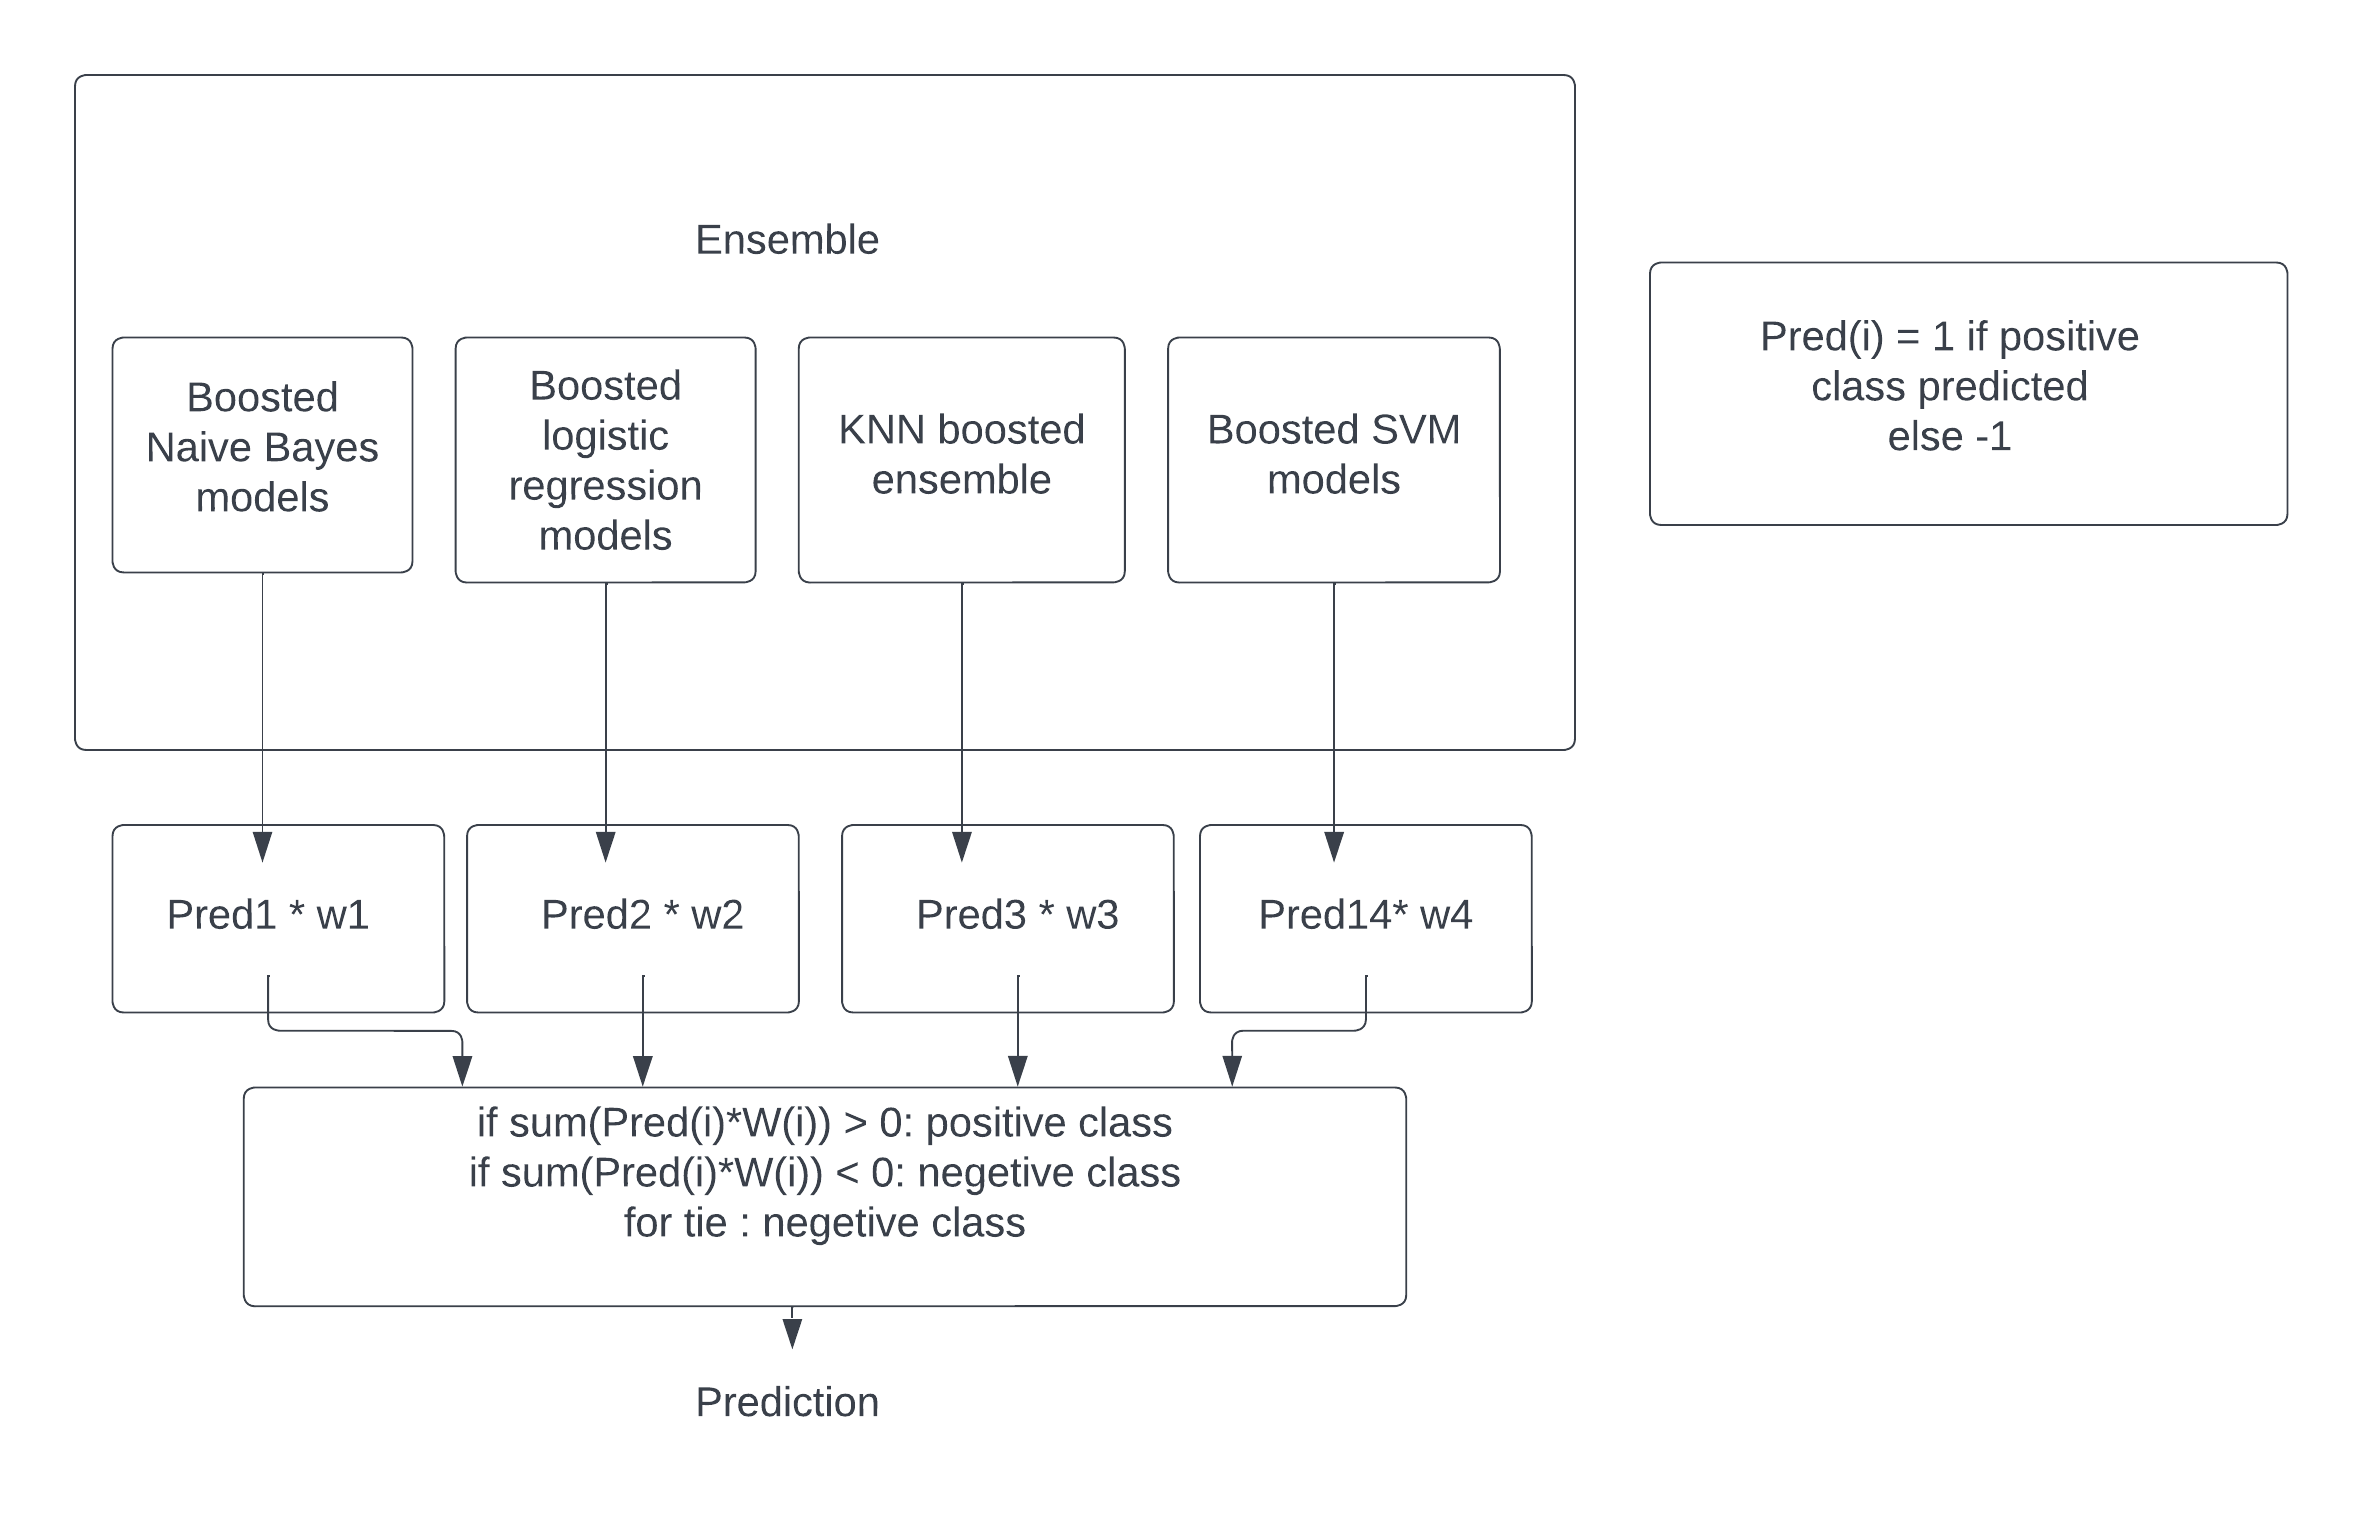

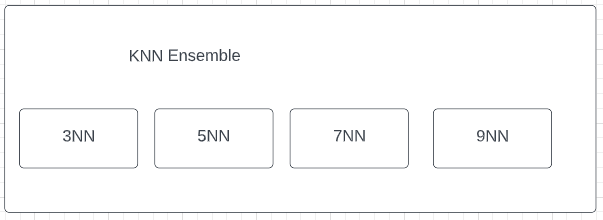

#Imports 

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import random
import math
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import roc_auc_score, roc_curve

In [7]:
# for replicable results
random.setstate((3,(1095526670,1396758080,2008884797,3264096084,1921776031,3441680460,1486809394,2572137485,4145935971,1349802006,463508956,964331537,2857071813,1826714923,3520145282,2920352654,2071574259,627845103,2841449886,405414482,1821205564,1786960371,914489532,2396037592,3397512933,894434976,4209874940,1863665315,207629221,3520177216,2222737365,2621594600,4066368257,2417535458,3953068668,3081354538,3640204294,4200827607,404664632,1745643460,1196994323,875739845,412199939,727037098,1319930206,3505511854,1210370538,2492662633,3299130478,984836120,2119380412,364663235,2475171048,1455549138,2234471564,120881068,2198691198,3843494076,2118211216,1296901948,4005021698,2005503865,2359866787,1470736600,3076639799,1487017673,426789044,3985700803,2600206175,1233475965,509267628,3193961759,1847662865,1723102417,4157452123,1728151333,706387211,2528962605,3939357476,2440755986,3599169684,2441544639,1892858418,2274973459,1213072951,1223771827,1626478461,628496013,3760711842,4081700750,3091801533,4051597136,180381000,1554453726,2937386839,2508025643,2814906023,3216883060,3133715994,1189561955,314635189,467503306,3696155679,257116788,203226293,1167315222,3273974343,3953676797,3419560249,3759351484,262004728,2996539559,1917736730,632448726,3191049790,1485271635,4119089543,1870756836,3084635237,3228075644,1942896199,3424576595,2667978147,2276256921,1284888057,315794024,1306570988,2383666661,2573317264,1721734309,2214790840,4109825248,3340136029,2983594856,2886440921,2550147015,2327501786,3097443261,211957405,3177089339,2549595650,3644651338,3253216805,2470525022,1739966593,952053347,3923739229,144113410,239177659,2976928501,2006252970,1051453341,1580581895,1080092689,1894292796,2481261981,3811686900,2254959557,2044864238,429221011,1474881355,2592593975,2188347460,1625440438,35770487,2566051221,2351818415,3773934225,4015634314,536716008,3213093018,467032782,1968661128,1370346755,1924053089,1937582543,807698672,3392350695,417944572,2429200232,2691501594,2763265250,211748338,2336031957,3666932296,3742711163,4043975389,1966298035,470257361,2847601440,2480417493,2032039932,3003636516,2032211710,1065188071,2076806044,993522068,2584152432,3569478151,1907522854,447172290,2551674979,3030309515,655793168,3698585413,2579849060,3523629961,2308268076,3758566490,3952842295,1226108139,40068126,2295685813,1260512057,1064927860,2095884687,780316434,3776296384,803062772,1646871899,1046781488,3280935656,3726473109,1262547205,2498012540,2556963239,782008486,1196529368,960504662,2553450021,1990690380,1402639820,2073047442,4189765836,2639654668,113950733,488974975,3689840069,4090367811,1197109280,797973535,666982545,2583066927,3423305474,4085169589,2353525351,504208138,3183076867,3279908240,20887015,1731841981,1416227867,4225977641,2524973133,1857088358,2880169099,253920118,2272976147,3615589136,791620458,2574739428,242003383,2421250524,1680587219,3525626307,4181737059,435218266,155817079,1461653875,1191957464,3050575592,25398596,2580635609,1406434726,2153777836,2185198155,4224677312,3977479346,1224086686,3926271099,1273967986,3171712317,3864241190,3356135353,4164990828,1475539766,1319894467,3824495906,3967203431,3954404942,3906205004,2244603525,523373890,2711136700,1267685670,1237275356,1052696788,3354136633,270440278,957317353,2968589471,580928052,79510127,151620257,651398031,526726631,2316127021,4072462355,3000899881,1372727196,1906867166,1284158193,2341177312,1471084606,2972815436,1242398595,914477743,3884487673,2714430397,2021261399,330049054,2596162225,1945357657,2795200187,3941371664,561518066,1788179302,263097182,3792348837,3569363337,2618516170,2230909246,632498740,3199463575,3764095467,346626151,246869836,2930676968,4163914962,3488728414,1153527339,118693997,2097225518,2420341417,468352918,3223971110,2420401789,4059946613,1779435729,2298743356,4230892684,1594849049,1960656321,3329482024,2575807441,2965025377,654426779,234564787,3073287030,1528399635,1540439162,2142366597,2170657936,778415824,4001865490,1258350457,1455356812,1374636512,976587332,1450173754,818684542,3986763954,4009439266,3727478078,3844914401,1025620466,2153335296,3844594763,575041185,3741607320,3014935731,4007685710,1338826892,4169336468,2362181078,200073410,3503646099,2345154614,1503696427,87997694,1313616059,3977199738,2370940552,2896117448,2534346311,268592192,2982893819,85160015,963313158,1800117630,3741648980,3354896052,1200302384,4288056762,2652519963,3662721971,798394044,1218681001,2319229293,1629139311,2526340499,3263912973,279934596,3382204582,1310918446,3729785559,1140977187,2389308020,4191193949,3534464096,2747421154,2964821776,365714248,2176989987,1288467215,366385305,1139733888,2779457315,2957984501,3485245773,1294164950,2824212558,143879299,703232628,3137258030,1398202674,3656961793,3444246707,277420882,1802627894,1560610492,1386935885,1103024037,3629805401,540485441,2536534509,3159677115,90262730,3972159998,711253291,995137592,4055163475,2743717766,3070788386,1407161389,4133595320,1973192579,1483549923,3282783593,2619682114,3126241181,2068919233,66678521,3222157232,2442153575,3432724961,4266134852,1714356870,153046372,2512361479,3555006708,1607709680,4098029719,3382154633,3421763468,918078213,504226077,759947740,2617929841,2271379667,4031762239,4224373405,3551398111,3428414804,374646693,209330731,1507349276,1125652303,131495237,60206615,1293447288,632038016,3964523958,1154299713,1427648933,4000967430,3451729730,2491978809,1053268546,2023365823,3303008916,824268810,1068113226,131537321,3851264987,1973995174,2807915006,2507685179,3633377137,1667803675,2623013199,2998629840,1046961700,3170863539,1552490208,1931606970,3687726743,853289210,2731937545,273347819,2671718162,235822353,248799907,2183565794,64821930,1691937716,2525272693,686986,2204175740,4060255571,382467031,3261349919,2330642797,3110865403,586757559,737790593,2271638018,2394489263,1917639540,269748160,2766176898,3245775298,4046742026,1318537461,1119373069,3524563495,2594053647,2690801533,2358721973,2404678365,1429515448,2821560377,1365065724,2846726479,2381905667,2850678088,3927905349,553150821,1757033348,3948188672,1138614840,820686992,872172464,3178474263,4073087273,2084087046,1203127703,3811359961,1790367793,2719331353,2474156608,3411508350,2781249312,1089188569,627993827,985009162,2140204479,1575599629,2046979355,827628289,4069993461,354194064,3468299339,941986534,2061948836,1659119618,4175839307,2269439364,3294744152,1644983045,1387327694,1345423335,3583797444,2282768123,2694806356,4228323074,1853094901,1521288199,79317133,2746257111,2463313767,3864176098,1602523133,76396718,2260541248,3728359468,286985949,1391152592,1080520093,4260288182,1295660270,3766972088,841571130,1935986999,1188849472,2482465101,2531740855,3553421932,3948698884,3971521756,4260206031,2937813641,1801579533,2439867516,240),None))

# Descriptive Analysis 

Getting and breif overview of the dataset

In [119]:
dataframe = pd.read_csv('/content/diabities_dataset.csv')

attribute_names = ['Age'	,'Gender'	,'Polyuria'	,'Polydipsia'	,'sudden weight loss'	,'weakness'	,'Polyphagia'	,'Genital thrush',	'visual blurring',	'Itching'	,'Irritability'	,'delayed healing'	,'partial paresis',	'muscle stiffness',	'Alopecia',	'Obesity'	,'class']
attribute_types = ['numeric','categorical','categorical','categorical','categorical','categorical','categorical','categorical','categorical','categorical','categorical','categorical','categorical','categorical','categorical','categorical','categorical','categorical']
att_to_type = { attribute_names[i] : attribute_types[i] for i in range(len(attribute_names))}

pd.set_option('display.max_rows', 520)

for attribute in attribute_names: 
  if att_to_type[attribute] == "categorical": print(f"mode of {attribute}: {dataframe[attribute].mode()[0]}")
dataframe.describe().transpose()


mode of Gender: Male
mode of Polyuria: No
mode of Polydipsia: No
mode of sudden weight loss: No
mode of weakness: Yes
mode of Polyphagia: No
mode of Genital thrush: No
mode of visual blurring: No
mode of Itching: No
mode of Irritability: No
mode of delayed healing: No
mode of partial paresis: No
mode of muscle stiffness: No
mode of Alopecia: No
mode of Obesity: No
mode of class: Positive


,count,mean,std,min,25%,50%,75%,max
Age,520.0,48.028846,12.151466,16.0,39.0,47.5,57.0,90.0


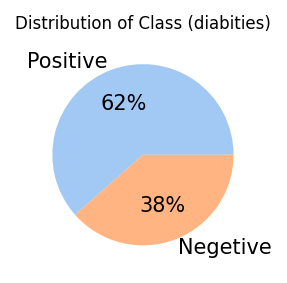

In [120]:
plt.figure(figsize=(2,2), dpi=150)
labels = ['Positive', 'Negetive']
dataframe['class'].value_counts()[0]
data = [dataframe['class'].value_counts()[0], dataframe['class'].value_counts()[1]]
colors = sns.color_palette('pastel')[0:5]
fig = plt.pie(x=data, labels=labels, colors=colors, autopct='%.0f%%')
plt.title('Distribution of Class (diabities)', size = 8)
plt.show()

We can see that our positive class is lesser in frequency
Thus we are facing the class imbalance problem but to a small magnitude only.

Handling missing values: 
since the dataset is small we can not afford to delete those rows, we instead chose to impute those values using the mode for categorical and mean for quantitative attributes. 

In [121]:
length = len(attribute_names)
modeVal = dataframe.mode()
print(f"There are {dataframe.isnull().sum().sum()} missing values that we need to handle")

for attribute in attribute_names[:-1]:
    if att_to_type[attribute] == "numerical":
        meanVal = dataframe.describe().transpose()['mean'][i]
        dataframe[attribute] = dataframe[attribute].replace(np.NaN, meanVal)
    else:
        modeI = modeVal[attribute].to_numpy()[0]
        dataframe[attribute] = dataframe[attribute].replace(np.NaN, modeI)

dataframe.to_csv('/content/diabities.csv', index=None)

There are 0 missing values that we need to handle


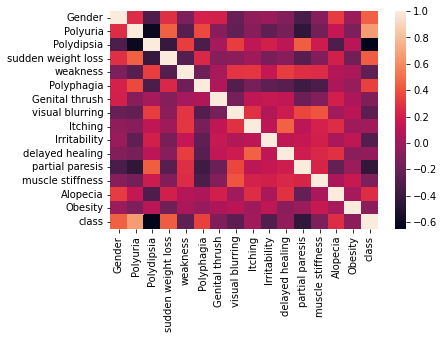

In [122]:
def label_encoding(array):
  counter = 0
  mapping = {}
  encoded = []
  for label in array:
    if not (label in mapping):
      mapping[label] = counter
      counter+=1
    encoded.append(mapping[label])
    
  return encoded  
  
temp = pd.DataFrame()

for i,attribute in enumerate(attribute_names):
  
  array = dataframe[attribute].to_numpy()
  if att_to_type[attribute]=="categorical":
    array = label_encoding(array)

    temp[attribute] = array
sns.heatmap(temp.corr())

Plot regarding the age distribution and its relation with risk of diabities

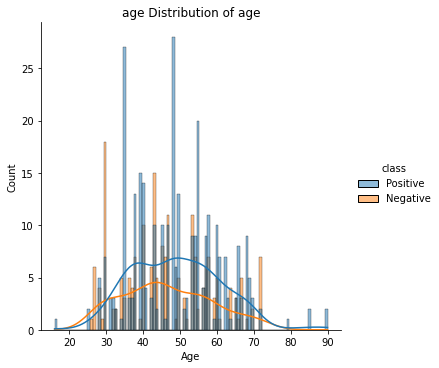

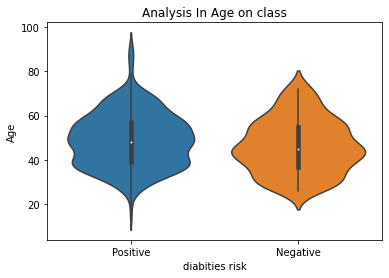

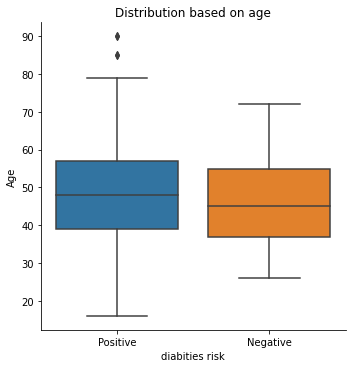

In [123]:
sns.displot(data=dataframe, x='Age', kde=True, hue = "class", bins=100).set(title="{} Distribution of age".format('age'))
plt.show()

sns.violinplot(x="class", y="Age", data=dataframe).set(title="Analysis In Age on class", xlabel="diabities risk")
plt.show()

print()

sns.catplot(x="class", y="Age", data=dataframe, kind="box").set(title="Distribution based on age", xlabel = "diabities risk")
plt.show()

Visualtion of relation between Gender and class     

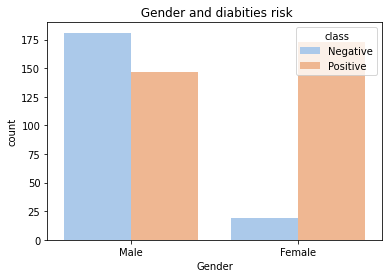

In [98]:
sns.countplot(data=dataframe, x='Gender', hue="class", palette="pastel").set(title=" Gender and diabities risk".format('result'))
plt.show()

Visualtion of relation between Gender and age

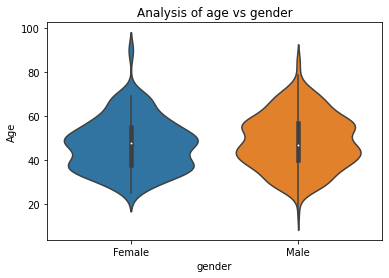

In [124]:
sns.violinplot(x="Gender", y="Age", data=dataframe).set(title="Analysis of age vs gender", xlabel="gender")
plt.show()

Visualization of the attributes relating to symptoms

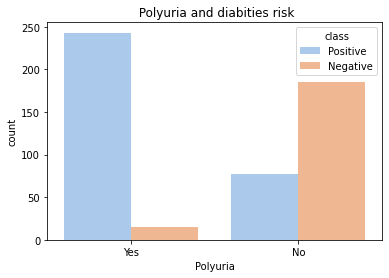

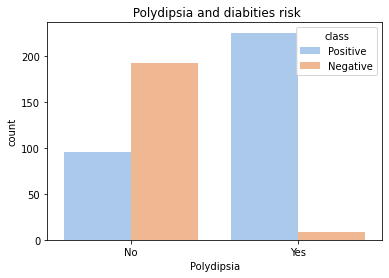

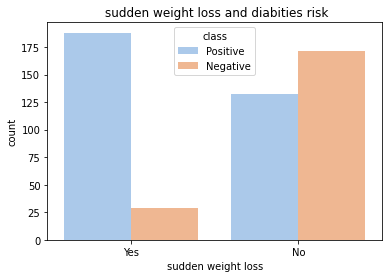

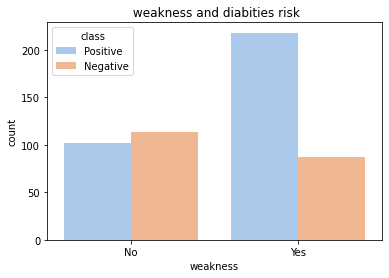

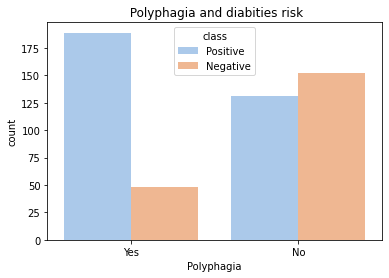

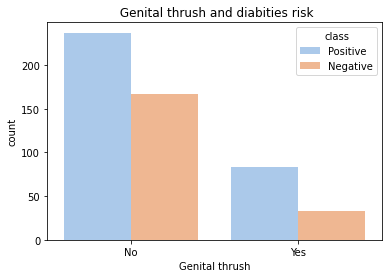

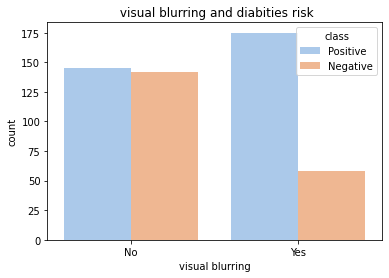

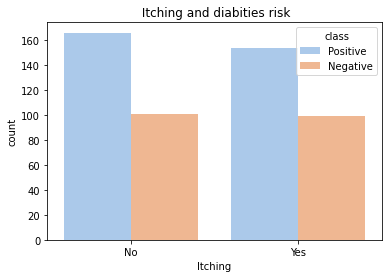

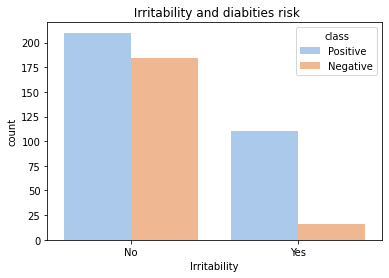

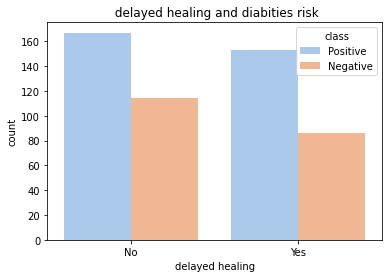

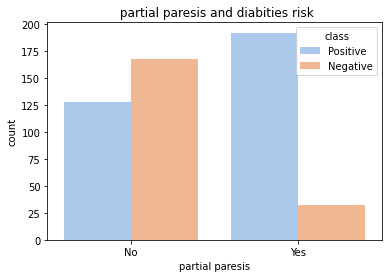

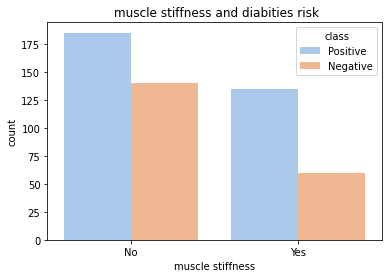

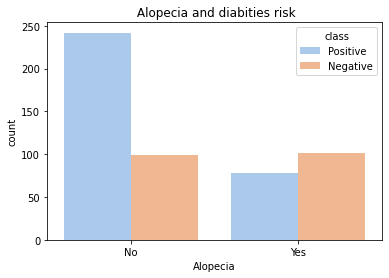

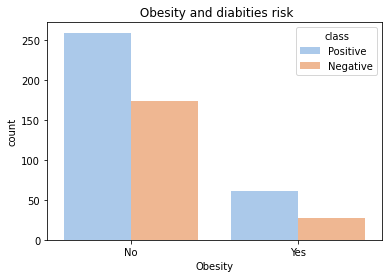

In [125]:
for attribute in attribute_names[2:-1]:
  a = sns.countplot(data=dataframe, x=attribute, hue="class", palette="pastel").set(title=f" {attribute} and diabities risk".format('result'))
  plt.show()

# Preprocessing 

Function to Min Max Scale 

In [67]:
def MinMax(array):

  maxm = np.max(array)
  mini = np.min(array)
  modified_array = []
  
  for i in range(0, len(array)):    
   if(array[i] > maxm):    
       maxm = array[i]
   elif(array[i]<mini):
       mini=array[i]  

  modified_array = [(array[i]-mini)/(maxm-mini) for i in range(len(array))]

  return modified_array

Function to StandardScale

In [68]:
def Standardize(array):
  
  n = len(array)
  mean = sum(array)/n
  deviations = [(x - mean) ** 2 for x in array]
  variance = sum(deviations) / n

  std_dev = math.sqrt(variance)
  
  modified_array = [ (array[i]-mean)/std_dev for i in range(len(array))] 
  return modified_array

Label Encoding

In [69]:
def label_encoding(array):
  counter = 0
  mapping = {}
  encoded = []
  for label in array:
    if not (label in mapping):
      mapping[label] = counter
      counter+=1
    encoded.append(mapping[label])
    
  return encoded  

One hot encoding for increased accuracy and F score [3]
(for the sake of computational efficiency labels with frequency less than min freq are grouped together as  'others' thus considered infrequent. The function takes in label encoded array. 

In [70]:
def one_hot_encode(array, min_freq=4):
  freq = {}
  encoded = []
  
  for e in array: freq[e] = 1 + freq.get(e,0)
  total = len(freq)
  
  for key in list(freq.keys()): 
    if freq[key] < min_freq:
      del freq[key]    

  significant_count = len(freq)
  insignificant_count = total - significant_count
  columns_needed = significant_count + (1 if insignificant_count else 0)

  for e in array:
    row = [0] * (columns_needed) 
    if e<significant_count:
      row[len(row)-1-e] = 1
    else:
      row[0]=1 
    encoded.append(row)
  
  return encoded

Using Min Max scaling and Standarization to increase accuracy [4] :            
Using min max on attributes with well defined boundaries and standarization on attribute such as age            
Note: attributes with binary values {0/1} will be unchanged by minmax scaling so minmax scaling is able to act as default. Thus if no scaling needed we can still min max scale.

In [71]:
attribute_scaling = ['Standard','Standard','Standard','Standard','Standard','Standard','Standard','Standard','Standard','Standard','Standard','Standard','Standard','Standard','Standard','Standard']

Preparing the data

In [72]:
dataframe = pd.read_csv('/content/diabities_dataset.csv')
dataframe = dataframe.sample(frac = 1)  # to shuffle
y = dataframe['class'].to_numpy()
for i,s in enumerate(y):
   if s=="Positive":
     y[i] = 1 
   else:
     y[i] = -1
y = np.array(y,dtype=np.int64)
XNE = pd.DataFrame()
yNE = list(y)
X = pd.DataFrame()

for i,attribute in enumerate(attribute_names[:-1]):
  
  array = dataframe[attribute].to_numpy()
  arrays = None

  if att_to_type[attribute]=="categorical":
    array = label_encoding(array)
    arrays = one_hot_encode(array)

  if attribute_scaling[i]=="MinMax":
    modified_array = MinMax(array)
  elif attribute_scaling[i]=="Standard":
    modified_array = Standardize(array)
  else: 
    modified_array = None

  if arrays:
    columns = len(arrays[0])
    arrays = np.array(one_hot_encode(array))

    for col in range(columns):
      X[attribute+str(col+1)] = arrays[:,col]
  else:
    X[attribute] = modified_array
  XNE[attribute] = modified_array

X.info()

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15,random_state=44) # 90% training and 10% test
XNE_train, XNE_test, yNE_train, yNE_test = train_test_split(XNE, y, test_size=0.10,random_state=21, shuffle=True) # 90% training and 10% test

#getting rid of the dataframe 
XNE = [list(XNE.iloc[i])for i in range(len(XNE))]
X = [list(X.iloc[i])for i in range(len(X))]
X_train = [list(X_train.iloc[i]) for i in range(len(X_train))]
X_test = [list(X_test.iloc[i]) for i in range(len(X_test))]
XNE_train = [list(XNE_train.iloc[i]) for i in range(len(XNE_train))]
XNE_test = [list(XNE_test.iloc[i]) for i in range(len(XNE_test))]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 31 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  520 non-null    float64
 1   Gender1              520 non-null    int64  
 2   Gender2              520 non-null    int64  
 3   Polyuria1            520 non-null    int64  
 4   Polyuria2            520 non-null    int64  
 5   Polydipsia1          520 non-null    int64  
 6   Polydipsia2          520 non-null    int64  
 7   sudden weight loss1  520 non-null    int64  
 8   sudden weight loss2  520 non-null    int64  
 9   weakness1            520 non-null    int64  
 10  weakness2            520 non-null    int64  
 11  Polyphagia1          520 non-null    int64  
 12  Polyphagia2          520 non-null    int64  
 13  Genital thrush1      520 non-null    int64  
 14  Genital thrush2      520 non-null    int64  
 15  visual blurring1     520 non-null    int

# Classes for ensemble and adaboost

Ensemble, designed for classifiers with 2 classes
supports training and assigning decision weights

In [ ]:
class myEnsemble:
  def __init__(self,models = [], weights = []):
    self.models = []
    self.weights = []
    self.models = models
    self.default_weight = 1
    if weights: 
      self.weight = { models[i] : weights[i] for i in range(len(models))}
    else:
      self.weight = {models[i] : self.default_weight for i in range(len(models))}
  
  def addModel(self,model, weight = None):

    self.models.append(model)
    self.weight[model] = weight if weight else self.default_weight

  def predict(self, X):
    res = [0] * len(X)
    for model in self.models:
      weightCur = 1
      preds = model.predict(X)
      for i,e in enumerate(preds):
        res[i]+= e * weightCur

    return [1 if e>0 else -1 for e in res]  
  

  def train(self,X_train,y_train,X_test=None, y_test=None):
    self.weights = []
    for model in self.models:
      model.fit(X_train,y_train)
      if X_test:
        self.weights.append(metrics.accuracy_score(model.predict(X_test),y_test))
      else:
        self.weights.append(metrics.accuracy_score(model.predict(X_test),y_train))


  def get_accuracy(self, X_test,y_test):

    return metrics.accuracy_score(self.predict(X_test),y_test)

Helper functions for adaboost       

*  weighted random sampling     
*  error calculaion  
*  weight updation  
*  and weight normalizaiton



    
  
       

In [ ]:
def weighted_random_sampling(X,y,weights=None):
	
	if not weights:
		weights = [1/len(X) for a in X]

	Xi = []
	yi = []
	cumulative_weights = [weights[0]]


	for i in range(1,len(X)):
		value = cumulative_weights[i - 1] + weights[i]
		cumulative_weights.append( value if value<1 else 1 )
	
	for i in range(len(X)):
		random_value = round(random.uniform(0.0,1.0),5)
		min_difference = 1.0
		closest_index = 0

		for cumul_wt_index in range(len(X)):
			current_diff = abs(random_value - cumulative_weights[cumul_wt_index])
			if current_diff < min_difference:
				min_difference = current_diff
				closest_index = cumul_wt_index

		Xi.append(X[closest_index])
		yi.append(y[closest_index])
	
	return Xi,yi

def get_error(preds, y, weights):
	return sum(weights * (np.not_equal(y, preds)).astype(int))/sum(weights)

def normalize_weights(weights):
	weight_sum = sum(weights)
	for i,w in enumerate(weights):
		weights[i] = w/weight_sum
	return weights

def update_weights(preds,y,alpha,weights):

	return [weights[i] * np.exp(alpha * (np.not_equal(y[i], preds[i])).astype(int)) for i in range(len(weights))]


AdaBoost[5]        
A slighty modified implementation of the adaboost algorithm suitable for the dataset.


In [ ]:
class myBoostedEnsemble:
  def __init__(self, classifier = None, ensemble_classifiers = None):
    
    self.classifier = classifier
    self.ensemble_classifiers = ensemble_classifiers
    self.boosted_ensemble = myEnsemble([]) 

  def predict(self,X):
    if self.boosted_ensemble: return self.boosted_ensemble.predict(X)
  
  def train(self,X,y,num_rounds,X_test=None,y_test=None):
    
    weights = [1/len(X)] * len(X)
    self.boosted_ensemble = myEnsemble([]) 

    i=0
    attempts_counter = 0
    while i<num_rounds and attempts_counter<2*num_rounds:    # attempts counter to avoid infinite loop
      attempts_counter+=1
      Xi,yi = weighted_random_sampling(X,y,weights)
      if abs(sum(yi))==len(X): # it means only one class is left
        weights = [1/len(X)] * len(X)
        continue
      
      if self.classifier == None:
        ensemble_models = []
        for j,m in enumerate(self.ensemble_classifiers):
          if m==KNeighborsClassifier:
            ensemble_models.append(m(j+1))
          else:
            ensemble_models.append(m())
        model = myEnsemble(ensemble_models)
        model.train(Xi,yi,X_test,y_test)
      else: 
        if self.classifier==KNeighborsClassifier:
          model = self.classifier(3)
        else:
          model = self.classifier()
        model.fit(Xi,yi)
      
      preds = model.predict(X)
      error = get_error(preds,yi,weights)
      
      if error>0.5: 
        weights = [1/len(X)] * len(X)
        continue
      if error< 0.001 :
        error=0.001
      
      alpha =  math.log((1 - error)/ error)
      weights = update_weights(preds,y,alpha,weights)
      weights = normalize_weights(weights)
      self.boosted_ensemble.addModel(model,alpha)
      i+=1
  
  def get_accuracy(self, X_test,y_test):
    return metrics.accuracy_score(self.predict(X_test),y_test)

# Evaluation and cross validation functions 

In [ ]:
def cross_val(X,y,k):
  
  rounds = []
  y = y.tolist()
  N = len(X)//k # no of tuples in a fold
  confusion_mats = []
  for i in range(k):
    Xval, yval = X[i*N:(i+1)*N], y[i*N:(i+1)*N]
    Xtrain = X[:i*N] + X[(i+1)*N:]
    ytrain = y[:i*N] + y[(i+1)*N:]

    rounds.append([Xtrain,ytrain,Xval,yval])
  return rounds


def confusion_matrix(y,preds):
  TP,FP,FN,TN = 0,0,0,0
  for i in range(len(y)):
    if y[i]==preds[i]:
      if preds[i]==1: 
        TP+=1
      else:
        TN+=1
    else:
      if preds[i]==1:
        FP+=1
      else:
        FN+=1
  return [[TP, FN], [FP, TN]]

def accuracy(confusion_mat):

  TP = confusion_mat[0][0]
  FN = confusion_mat[0][1]
  FP = confusion_mat[1][0]
  TN = confusion_mat[1][1]
  return (TP+TN) / (TP+TN+FP+FN)


def get_precision(confusion_mat):
  TP = confusion_mat[0][0]
  FP = confusion_mat[1][0]
  return TP/(TP+FP)

def get_recall(confusion_mat):
  TP = confusion_mat[0][0]
  FN = confusion_mat[0][1]
  return TP/(TP+FN)

def f_score(confusion_mat,beta = 1):
  precision = get_precision(confusion_mat)
  recall = get_recall(confusion_mat)
  return ( (beta*beta + 1)*precision*recall ) / (beta*beta*precision+recall) 

def display_confusion_matrix(confusion_mat):
  a = sns.heatmap(confusion_mat, annot=True)

# Models and their evaluation 



avg accuracy: 0.8903846153846153, avg f1 score: 0.9110428622123713, avg f2 score: 0.9146095055171897


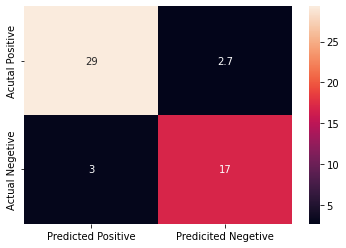

In [ ]:
data = cross_val(X,y,10)

accuracies, f1s, f2s = [], [], []
AvgCM = [[0,0],[0,0]]
for X_train,y_train, X_test, y_test in data:
  
  modelNB = GaussianNB()
  modelNB.fit(X_train,y_train)
  cm = confusion_matrix(y_test,modelNB.predict(X_test))
  AvgCM[0][0], AvgCM[0][1] = AvgCM[0][0]+cm[0][0]/10, AvgCM[0][1]+cm[0][1]/10
  AvgCM[1][0], AvgCM[1][1] = AvgCM[1][0]+cm[1][0]/10, AvgCM[1][1]+cm[1][1]/10
  accuracies.append(accuracy(cm))
  f1s.append(f_score(cm)) 
  f2s.append(f_score(cm,2)) 

a = sns.heatmap(AvgCM, annot=True, xticklabels=["Predicted Positive","Predicited Negetive"], yticklabels = ["Acutal Positive","Actual Negetive"] )
print(f"avg accuracy: {sum(accuracies)/10}, avg f1 score: {sum(f1s)/10}, avg f2 score: {sum(f2s)/10}")

avg accuracy: 0.9711538461538461, avg f1 score: 0.9766135036265385, avg f2 score: 0.9762237245557198


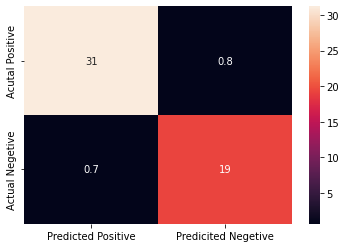

In [ ]:
data = cross_val(X,y,10)

accuracies, f1s, f2s = [], [], []
AvgCM = [[0,0],[0,0]]
for X_train,y_train, X_test, y_test in data:
  
  modelSVC = SVC()
  modelSVC.fit(X_train,y_train)
  cm = confusion_matrix(y_test,modelSVC.predict(X_test))
  AvgCM[0][0], AvgCM[0][1] = AvgCM[0][0]+cm[0][0]/10, AvgCM[0][1]+cm[0][1]/10
  AvgCM[1][0], AvgCM[1][1] = AvgCM[1][0]+cm[1][0]/10, AvgCM[1][1]+cm[1][1]/10
  accuracies.append(accuracy(cm))
  f1s.append(f_score(cm)) 
  f2s.append(f_score(cm,2)) 

a = sns.heatmap(AvgCM, annot=True, xticklabels=["Predicted Positive","Predicited Negetive"], yticklabels = ["Acutal Positive","Actual Negetive"] )
print(f"avg accuracy: {sum(accuracies)/10}, avg f1 score: {sum(f1s)/10}, avg f2 score: {sum(f2s)/10}")

avg accuracy: 0.926923076923077, avg f1 score: 0.9401612611545744, avg f2 score: 0.9379034238229453


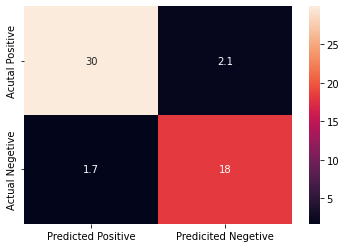

In [ ]:
data = cross_val(X,y,10)
accuracies, f1s, f2s = [], [], []
AvgCM = [[0,0],[0,0]]
for X_train,y_train, X_test, y_test in data:
  modelLR = LogisticRegression()
  modelLR.fit(X_train,y_train)
  cm = confusion_matrix(y_test,modelLR.predict(X_test))
  AvgCM[0][0], AvgCM[0][1] = AvgCM[0][0]+cm[0][0]/10, AvgCM[0][1]+cm[0][1]/10
  AvgCM[1][0], AvgCM[1][1] = AvgCM[1][0]+cm[1][0]/10, AvgCM[1][1]+cm[1][1]/10
  accuracies.append(accuracy(cm))
  f1s.append(f_score(cm)) 
  f2s.append(f_score(cm,2)) 

a = sns.heatmap(AvgCM, annot=True, xticklabels=["Predicted Positive","Predicited Negetive"], yticklabels = ["Acutal Positive","Actual Negetive"] )
print(f"avg accuracy: {sum(accuracies)/10}, avg f1 score: {sum(f1s)/10}, avg f2 score: {sum(f2s)/10}")

avg accuracy: 0.9596153846153846, avg f1 score: 0.9675873647715335, avg f2 score: 0.9660047810251887


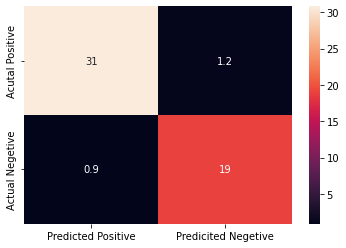

In [ ]:
data = cross_val(X,y,10)
accuracies, f1s, f2s = [], [], []
AvgCM = [[0,0],[0,0]]
for X_train,y_train, X_test, y_test in data:
  modelTree = DecisionTreeClassifier()
  modelTree.fit(X_train,y_train)
  cm = confusion_matrix(y_test,modelTree.predict(X_test))
  AvgCM[0][0], AvgCM[0][1] = AvgCM[0][0]+cm[0][0]/10, AvgCM[0][1]+cm[0][1]/10
  AvgCM[1][0], AvgCM[1][1] = AvgCM[1][0]+cm[1][0]/10, AvgCM[1][1]+cm[1][1]/10
  accuracies.append(accuracy(cm))
  f1s.append(f_score(cm)) 
  f2s.append(f_score(cm,2)) 

a = sns.heatmap(AvgCM, annot=True, xticklabels=["Predicted Positive","Predicited Negetive"], yticklabels = ["Acutal Positive","Actual Negetive"] )
print(f"avg accuracy: {sum(accuracies)/10}, avg f1 score: {sum(f1s)/10}, avg f2 score: {sum(f2s)/10}")

KNN Ensemble

avg accuracy: 0.9461538461538461, avg f1 score: 0.9536613195503831, avg f2 score: 0.9302831557852359


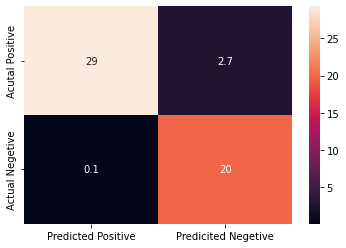

In [ ]:
data = cross_val(X,y,10)
accuracies, f1s, f2s = [], [], []
AvgCM = [[0,0],[0,0]]
for X_train,y_train, X_test, y_test in data:
  models = []
  for i in range(4):
    models.append(KNeighborsClassifier(i+1))
  Knn_ensemble = myEnsemble(models)
  Knn_ensemble.train(X_train,y_train,X_test,y_test)
  cm = confusion_matrix(y_test,Knn_ensemble.predict(X_test))
  AvgCM[0][0], AvgCM[0][1] = AvgCM[0][0]+cm[0][0]/10, AvgCM[0][1]+cm[0][1]/10
  AvgCM[1][0], AvgCM[1][1] = AvgCM[1][0]+cm[1][0]/10, AvgCM[1][1]+cm[1][1]/10
  accuracies.append(accuracy(cm))
  f1s.append(f_score(cm)) 
  f2s.append(f_score(cm,2)) 

a = sns.heatmap(AvgCM, annot=True, xticklabels=["Predicted Positive","Predicited Negetive"], yticklabels = ["Acutal Positive","Actual Negetive"] )
print(f"avg accuracy: {sum(accuracies)/10}, avg f1 score: {sum(f1s)/10}, avg f2 score: {sum(f2s)/10}")

# Adaboost training 

Using adaboost to increase performance and to help handle class imbalance problem[2].

In [ ]:
data = cross_val(X,y,10)

acc_boostedNB, acc_boostedSVC, acc_boostedKNNensemble, acc_boostedLR, acc_boostedTree = [],[],[],[],[] 
f1_boostedNB, f1_boostedSVC, f1_boostedKNNensemble, f1_boostedLR, f1_boostedTree = [],[],[],[],[] 
f2_boostedNB, f2_boostedSVC ,f2_boostedKNNensemble ,f2_boostedLR ,f2_boostedTree = [],[],[],[],[] 


boostedNB = myBoostedEnsemble(GaussianNB)
boostedSVC = myBoostedEnsemble(SVC)
boostedKNNemsemble = myBoostedEnsemble(None,[KNeighborsClassifier for i in range(4)])
boostedLR = myBoostedEnsemble(LogisticRegression)
boostedTree = myBoostedEnsemble(DecisionTreeClassifier)

for X_train,y_train, X_test, y_test in data:

  boostedNB.train(X,y,50)
  boostedSVC.train(X_train,y_train,50,X_test,y_test)
  boostedKNNemsemble.train(X_train,y_train,50,X_test,y_test)
  boostedLR.train(X_train,y_train,50,X_test,y_test)
  boostedTree.train(X_train,y_train,100,X_test,y_test)

  cmNB = confusion_matrix(y_test,boostedNB.predict(X_test))
  cmSVC = confusion_matrix(y_test,boostedSVC.predict(X_test))
  cmKNNEnsemble = confusion_matrix(y_test,boostedKNNemsemble.predict(X_test))
  cmLR = confusion_matrix(y_test,boostedLR.predict(X_test))
  cmTree = confusion_matrix(y_test,boostedTree.predict(X_test))
  
  acc_boostedNB.append(accuracy(cmNB))
  acc_boostedSVC.append(accuracy(cmSVC))
  acc_boostedKNNensemble.append(accuracy(cmKNNEnsemble))
  acc_boostedLR.append(accuracy(cmLR))
  acc_boostedTree.append(accuracy(cmTree))

  f1_boostedNB.append(f_score(cmNB))
  f1_boostedSVC.append(f_score(cmSVC))
  f1_boostedKNNensemble.append(f_score(cmKNNEnsemble))
  f1_boostedLR.append(f_score(cmLR))
  f1_boostedTree.append(f_score(cmTree))

  f2_boostedNB.append(f_score(cmNB,2))
  f2_boostedSVC.append(f_score(cmSVC,2))
  f2_boostedKNNensemble.append(f_score(cmKNNEnsemble,2))
  f2_boostedLR.append(f_score(cmLR,2))
  f2_boostedTree.append(f_score(cmTree,2))

In [ ]:
print(f"boosted Niave bayes=> avg accuracy: {sum(acc_boostedNB)/10}, avg f1 score: {sum(f1_boostedNB)/10}, avg f2 score: {sum(f2_boostedNB)/10}")
print(f"boosted SVC => avg accuracy: {sum(acc_boostedSVC)/10}, avg f1 score: {sum(f1_boostedSVC)/10}, avg f2 score: {sum(f2_boostedSVC)/10}")
print(f"boosted KNN Ensemble => avg accuracy: {sum(acc_boostedKNNensemble)/10}, avg f1 score: {sum(f1_boostedKNNensemble)/10}, avg f2 score: {sum(f2_boostedKNNensemble)/10}")
print(f"boosted Logistic regression => avg accuracy: {sum(acc_boostedLR)/10}, avg f1 score: {sum(f1_boostedLR)/10}, avg f2 score: {sum(f2_boostedLR)/10}")
print(f"boosted Decision Tree => avg accuracy: {sum(acc_boostedTree)/10}, avg f1 score: {sum(f1_boostedTree)/10}, avg f2 score: {sum(f2_boostedTree)/10}")

boosted Niave bayes=> avg accuracy: 0.903846153846154, avg f1 score: 0.9211499386451367, avg f2 score: 0.9234814705747134
boosted SVC => avg accuracy: 0.975, avg f1 score: 0.9796204295434814, avg f2 score: 0.9809134276460998
boosted KNN Ensemble => avg accuracy: 0.9461538461538461, avg f1 score: 0.9536613195503831, avg f2 score: 0.9302831557852359
boosted Logistic regression => avg accuracy: 0.9211538461538462, avg f1 score: 0.9355977121018955, avg f2 score: 0.9341353553187004
boosted Decision Tree => avg accuracy: 0.9711538461538461, avg f1 score: 0.9776423827140286, avg f2 score: 0.9752831375947391


# Ensemble of boosted classifiers
10 folds cross validation 

In [ ]:
k = 10
data = cross_val(X,y,k)

accuracies = []
f1s = []
f2s = []
AvgCM = [[0,0],[0,0]]
for X_train,y_train, X_test, y_test in data:

  boostedSVC.train(X_train,y_train,100)
  boostedKNNemsemble.train(X_train,y_train,50,X_test,y_test)
  boostedTree.train(X_train,y_train,50,X_test,y_test)

  ensemble_model = myEnsemble([])
  ensemble_model.addModel( boostedSVC, boostedSVC.get_accuracy(X_test,y_test)**2 )
  ensemble_model.addModel( boostedKNNemsemble, boostedKNNemsemble.get_accuracy(X_test,y_test)**2 )
  ensemble_model.addModel( boostedTree, boostedTree.get_accuracy(X_test,y_test)**2 )
  preds = ensemble_model.predict(X_test)
  cm = confusion_matrix(y_test,preds)

  AvgCM[0][0], AvgCM[0][1] = AvgCM[0][0]+cm[0][0]/k, AvgCM[0][1]+cm[0][1]/k
  AvgCM[1][0], AvgCM[1][1] = AvgCM[1][0]+cm[1][0]/k, AvgCM[1][1]+cm[1][1]/k
  
  accuracies.append(accuracy(cm))
  f1s.append(f_score(cm)) 
  f2s.append(f_score(cm,2)) 

avg accuracy: 0.9826923076923076, avg f1 score: 0.9862417872638586, avg f2 score: 0.9820918686433213


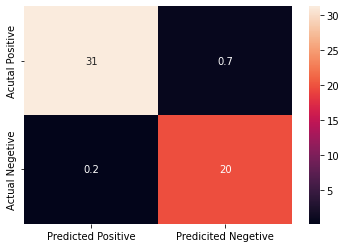

In [ ]:
print(f"avg accuracy: {sum(accuracies)/k}, avg f1 score: {sum(f1s)/k}, avg f2 score: {sum(f2s)/k}")
a = sns.heatmap(AvgCM, annot=True, xticklabels=["Predicted Positive","Predicited Negetive"], yticklabels = ["Acutal Positive","Actual Negetive"] )

ROC curve

ROC_AUC_SCORE : 0.9724128844668574


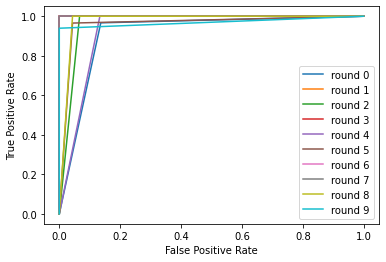

In [ ]:
k = 10
data = cross_val(X,y,k)

accuracies = []
f1s = []
f2s = []
ROC_AUC_SCORE = 0

for r,(X_train,y_train, X_test, y_test) in enumerate(data):

  boostedSVC.train(X_train,y_train,50)
  boostedKNNemsemble.train(X_train,y_train,50,X_test,y_test)
  boostedTree.train(X_train,y_train,50,X_test,y_test)
  ensemble_model = myEnsemble([])
  ensemble_model.addModel( boostedSVC, boostedSVC.get_accuracy(X_test,y_test)**2 )
  ensemble_model.addModel( boostedKNNemsemble, boostedKNNemsemble.get_accuracy(X_test,y_test)**2 )
  ensemble_model.addModel( boostedTree, boostedTree.get_accuracy(X_test,y_test)**2 )
  
  preds = ensemble_model.predict(X_test)
  ROC_AUC_SCORE += roc_auc_score(preds, y_test)
  fpr, tpr, thresholds = roc_curve(preds, y_test)
  label = f"round {r}"
  plt.plot(fpr, tpr, label = label)
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.legend()

print(f"ROC_AUC_SCORE : {ROC_AUC_SCORE/10}")

# References  

[1] UCI Machine Learning  Repository.                                                                   Islam, MM Faniqul, et al. 'Likelihood prediction of diabetes at early stage using data mining techniques.' Computer Vision and Machine Intelligence in Medical Image Analysis. Springer, Singapore, 2020. 113-125.

[2] Tanha, J., Abdi, Y., Samadi, N. et al. Boosting methods for multi-class imbalanced data classification: an experimental review. 
J Big Data 7, 70 (2020). https://doi.org/10.1186/s40537-020-00349-y

[3] Palheta, Helber & Gonçalves, Wanderson & de Brito, Leonardo & Ribeiro, Arthur & Santos, & Dos, Marlon & Matsumoto, Reis & Ribeiro dos Santos, Ândrea & Araújo, Gilderlanio. (2020). AmazonForest: In-silico Meta-Prediction of Pathogenic Variants. 10.20944/preprints202011.0519.v1. 

[4] Henderi, Henderi. (2021). Comparison of Min-Max normalization and Z-Score Normalization in the K-nearest neighbor (kNN) Algorithm to Test the Accuracy of Types of Breast Cancer. IJIIS: International Journal of Informatics and Information Systems. 4. 13-20. 10.47738/ijiis.v4i1.73. 

[5] Y. Freund, R. Schapire, “A Decision-Theoretic Generalization of on-Line Learning and an Application to Boosting”, 1995.

Documentations :  

  python3 : https://docs.python.org/3/            
  sklearn : https://scikit-learn.org/stable/          
  matplotlib : https://matplotlib.org/stable/index.html     
  pandas : https://pandas.pydata.org/docs/         
  numpy : https://numpy.org/doc/     
  random : https://docs.python.org/3/library/random.html         
  seaborn : https://seaborn.pydata.org/